In [2]:
import pandas as pd
import numpy as np

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("laotse/credit-risk-dataset")

print("Path to dataset files:", path)

100%|██████████| 368k/368k [00:00<00:00, 47.8MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/laotse/credit-risk-dataset/versions/1


In [3]:
df = pd.read_csv("/root/.cache/kagglehub/datasets/laotse/credit-risk-dataset/versions/1/credit_risk_dataset.csv")

In [4]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [5]:
df.shape

(32581, 12)

In [6]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [7]:
df.isna().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,895
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,3116
loan_status,0
loan_percent_income,0


In [15]:
n = len(df['person_emp_length']) - 895
bins_num = int(np.ceil(np.log2(n) + 1))

In [16]:
print(n)
print(bins_num)

31686
16


Text(0.5, 1.0, 'Employment length (in years) with Normal Distribution')

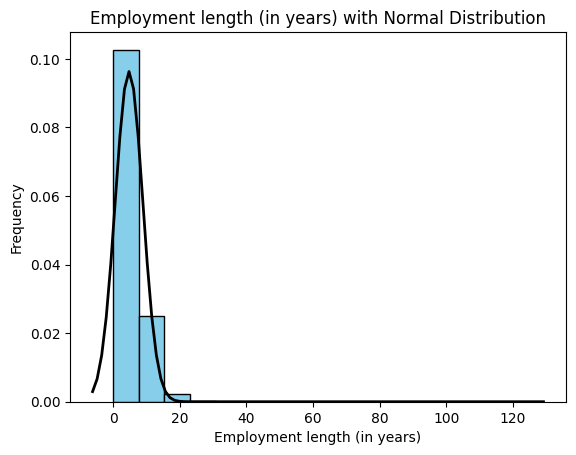

In [17]:
import scipy.stats as stats
import matplotlib.pyplot as plt

mean_person_emp_length = df['person_emp_length'].mean()
sd_person_emp_length = df['person_emp_length'].std()

plt.hist(df["person_emp_length"], bins=bins_num, color='skyblue', edgecolor='black', density=True)

xmin,xmax = plt.xlim()
x = np.linspace(xmin,xmax,100)
p = stats.norm.pdf(x, mean_person_emp_length, sd_person_emp_length)

plt.plot(x,p,'k',linewidth=2)

plt.xlabel("Employment length (in years)")
plt.ylabel("Frequency")
plt.title("Employment length (in years) with Normal Distribution")

In [18]:
from scipy.stats import kstest,norm

stat,p_value = kstest(df["person_emp_length"].dropna(),'norm',args=(df["person_emp_length"].mean(), df["person_emp_length"].std()))

print(f"K-S Test Statistic: {stat}, p-value: {p_value}")

if p_value > 0.05:
    print("The data of Employment length (in years) might come from a normal distribution")
else:
    print("The data of Employment length (in years) does not come from a normal distribution")

K-S Test Statistic: 0.1238007994131165, p-value: 0.0
The data of Employment length (in years) does not come from a normal distribution


In [19]:
# use median due to It doesn't come from normal distribution.
df["person_emp_length"] = df["person_emp_length"].fillna(df["person_emp_length"].median())

In [20]:
df.isnull().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,3116
loan_status,0
loan_percent_income,0


In [22]:
n_loan = len(df['loan_int_rate'].dropna())
bins_loan_num = int(np.ceil(np.log2(n_loan) + 1))

In [23]:
print(n_loan)
print(bins_loan_num)

29465
16


In [25]:
df.isnull().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,3116
loan_status,0
loan_percent_income,0


Text(0.5, 1.0, 'Interest rate with Normal Distribution')

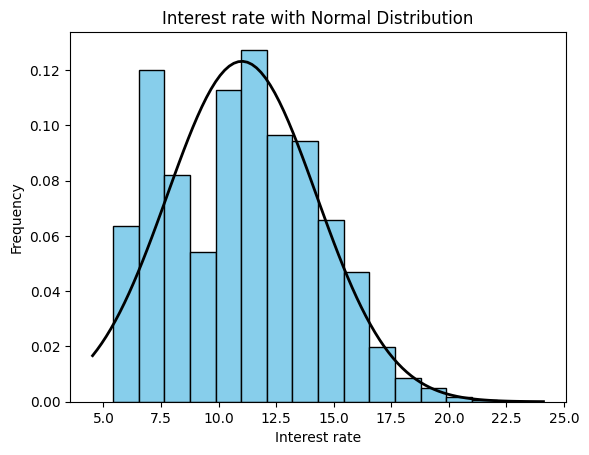

In [24]:
mean_loan_int_rate = df['loan_int_rate'].mean()
sd_loan_int_rate = df['loan_int_rate'].std()

plt.hist(df["loan_int_rate"], bins = bins_loan_num, color='skyblue', edgecolor='black', density=True)

xmin,xmax = plt.xlim()
x = np.linspace(xmin,xmax,100)
p = stats.norm.pdf(x, mean_loan_int_rate, sd_loan_int_rate)

plt.plot(x,p,'k',linewidth=2)

plt.xlabel("Interest rate")
plt.ylabel("Frequency")
plt.title("Interest rate with Normal Distribution")

In [26]:
stat,p_value = kstest(df["loan_int_rate"].dropna(),'norm',args=(df["loan_int_rate"].mean(), df["loan_int_rate"].std()))

print(f"K-S Test Statistic: {stat}, p-value: {p_value}")

if p_value > 0.05:
    print("The data of Interest rate might come from a normal distribution")
else:
    print("The data of Interest rate does not come from a normal distribution")

K-S Test Statistic: 0.09480018483714087, p-value: 6.42250196232518e-231
The data of Interest rate does not come from a normal distribution


In [27]:
# use median due to It doesn't come from normal distribution.
df["loan_int_rate"] = df["loan_int_rate"].fillna(df["loan_int_rate"].median())

In [28]:
df.isna().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,0
loan_status,0
loan_percent_income,0


In [30]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [29]:
df.dtypes

,0
person_age,int64
person_income,int64
person_home_ownership,object
person_emp_length,float64
loan_intent,object
loan_grade,object
loan_amnt,int64
loan_int_rate,float64
loan_status,int64
loan_percent_income,float64


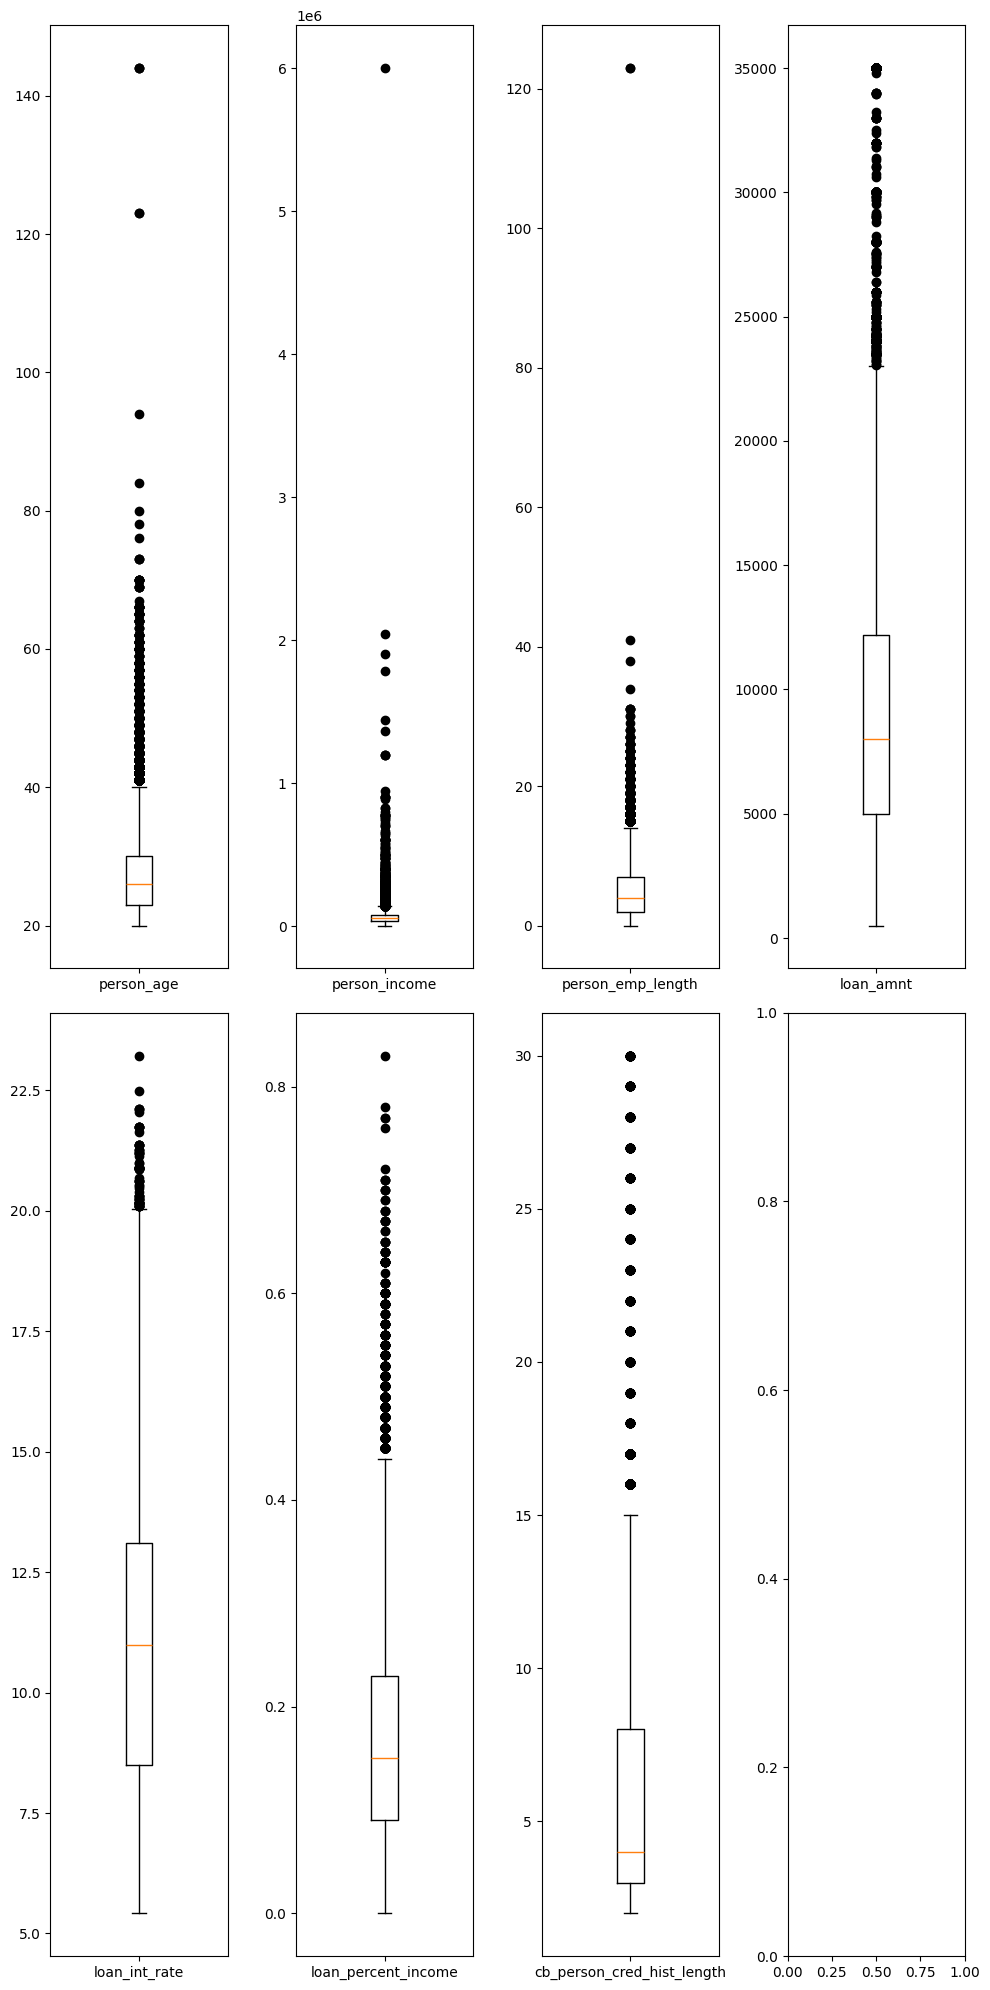

In [39]:
numeric_cols = [
                'person_age','person_income',
                'person_emp_length','loan_amnt',
                'loan_int_rate',
                'loan_percent_income','cb_person_cred_hist_length'
                ]

fig,axes = plt.subplots(figsize=(10,20), nrows=2 , ncols=4, squeeze=0)
i = 0

for ax,col in zip(axes.reshape(-1), numeric_cols):
  ax.boxplot(df[col], tick_labels=[col], sym='k')
plt.tight_layout()

In [40]:
df.dtypes

,0
person_age,int64
person_income,int64
person_home_ownership,object
person_emp_length,float64
loan_intent,object
loan_grade,object
loan_amnt,int64
loan_int_rate,float64
loan_status,int64
loan_percent_income,float64


In [43]:
# Eliminate outlier
Q1_person_age = df["person_age"].quantile(0.25)
Q3_person_age = df["person_age"].quantile(0.75)
IQR_person_age = Q3_person_age - Q1_person_age
print(f"IQR for Person Age is: {IQR_person_age}")

Q1_person_income = df["person_income"].quantile(0.25)
Q3_person_income = df["person_income"].quantile(0.75)
IQR_person_income = Q3_person_income - Q1_person_income
print(f"IQR for Person Income is: {IQR_person_income}")

Q1_person_emp_length = df["person_emp_length"].quantile(0.25)
Q3_person_emp_length = df["person_emp_length"].quantile(0.75)
IQR_person_emp_length = Q3_person_emp_length - Q1_person_emp_length
print(f"IQR for person_emp_length is: {IQR_person_emp_length}")

Q1_loan_amnt = df["loan_amnt"].quantile(0.25)
Q3_loan_amnt = df["loan_amnt"].quantile(0.75)
IQR_loan_amnt = Q3_loan_amnt - Q1_loan_amnt
print(f"IQR for loan_amnt is: {IQR_loan_amnt}")

Q1_loan_int_rate = df["loan_int_rate"].quantile(0.25)
Q3_loan_int_rate = df["loan_int_rate"].quantile(0.75)
IQR_loan_int_rate = Q3_loan_int_rate - Q1_loan_int_rate
print(f"IQR for loan_int_rate is: {IQR_loan_int_rate}")

Q1_loan_percent_income = df["loan_percent_income"].quantile(0.25)
Q3_loan_percent_income= df["loan_percent_income"].quantile(0.75)
IQR_loan_percent_income = Q3_loan_percent_income - Q1_loan_percent_income
print(f"IQR for loan_percent_income is: {IQR_loan_percent_income}")

Q1_cb_person_cred_hist_length	 = df["cb_person_cred_hist_length"].quantile(0.25)
Q3_cb_person_cred_hist_length	 = df["cb_person_cred_hist_length"].quantile(0.75)
IQR_cb_person_cred_hist_length	 = Q3_cb_person_cred_hist_length	 - Q1_cb_person_cred_hist_length
print(f"IQR for cb_person_cred_hist_length is: {IQR_cb_person_cred_hist_length	}")

IQR for Person Age is: 7.0
IQR for Person Income is: 40700.0
IQR for person_emp_length is: 5.0
IQR for loan_amnt is: 7200.0
IQR for loan_int_rate is: 4.619999999999999
IQR for loan_percent_income is: 0.14
IQR for cb_person_cred_hist_length is: 5.0


In [44]:
lower_bound_person_age = Q1_person_age - 1.5 * IQR_person_age
upper_bound_person_age = Q3_person_age + 1.5 * IQR_person_age
print(f"lower_bound_person_age: {lower_bound_person_age}")
print(f"upper_bound_person_age: {upper_bound_person_age}")
print("-----------------------------------")

lower_bound_person_income = Q1_person_income - 1.5 * IQR_person_income
upper_bound_person_income = Q3_person_income + 1.5 * IQR_person_income
print(f"lower_bound_person_income: {lower_bound_person_income}")
print(f"upper_bound_person_income: {upper_bound_person_income}")
print("-----------------------------------")

lower_bound_person_emp_length = Q1_person_emp_length - 1.5 * IQR_person_emp_length
upper_bound_person_emp_length = Q3_person_emp_length + 1.5 * IQR_person_emp_length
print(f"lower_bound_person_emp_length: {lower_bound_person_emp_length}")
print(f"upper_bound_person_emp_length: {upper_bound_person_emp_length}")
print("-----------------------------------")

lower_bound_loan_amnt = Q1_loan_amnt - 1.5 * IQR_loan_amnt
upper_bound_loan_amnt = Q3_loan_amnt + 1.5 * IQR_loan_amnt
print(f"lower_bound_loan_amnt: {lower_bound_loan_amnt}")
print(f"upper_bound_loan_amnt: {upper_bound_loan_amnt}")
print("-----------------------------------")

lower_bound_loan_int_rate = Q1_loan_int_rate - 1.5 * IQR_loan_int_rate
upper_bound_loan_int_rate = Q3_loan_int_rate + 1.5 * IQR_loan_int_rate
print(f"lower_bound_loan_int_rate: {lower_bound_loan_int_rate}")
print(f"upper_bound_loan_int_rate: {upper_bound_loan_int_rate}")
print("-----------------------------------")

lower_bound_loan_percent_income = Q1_loan_percent_income - 1.5 * IQR_loan_percent_income
upper_bound_loan_percent_income = Q3_loan_percent_income + 1.5 * IQR_loan_percent_income
print(f"lower_bound_loan_percent_income: {lower_bound_loan_percent_income}")
print(f"upper_bound_loan_percent_income: {upper_bound_loan_percent_income}")
print("-----------------------------------")

lower_bound_cb_person_cred_hist_length = Q1_cb_person_cred_hist_length - 1.5 * IQR_cb_person_cred_hist_length
upper_bound_cb_person_cred_hist_length = Q3_cb_person_cred_hist_length + 1.5 * IQR_cb_person_cred_hist_length
print(f"lower_bound_cb_person_cred_hist_length: {lower_bound_cb_person_cred_hist_length}")
print(f"upper_bound_cb_person_cred_hist_length: {upper_bound_cb_person_cred_hist_length}")
print("-----------------------------------")

lower_bound_person_age: 12.5
upper_bound_person_age: 40.5
-----------------------------------
lower_bound_person_income: -22550.0
upper_bound_person_income: 140250.0
-----------------------------------
lower_bound_person_emp_length: -5.5
upper_bound_person_emp_length: 14.5
-----------------------------------
lower_bound_loan_amnt: -5800.0
upper_bound_loan_amnt: 23000.0
-----------------------------------
lower_bound_loan_int_rate: 1.5600000000000014
upper_bound_loan_int_rate: 20.04
-----------------------------------
lower_bound_loan_percent_income: -0.12000000000000002
upper_bound_loan_percent_income: 0.44000000000000006
-----------------------------------
lower_bound_cb_person_cred_hist_length: -4.5
upper_bound_cb_person_cred_hist_length: 15.5
-----------------------------------


In [45]:
# Filter outliers based on the lower and upper bounds for each feature
df_filtered = df[
    ((df["person_age"] >= lower_bound_person_age) & (df["person_age"] <= upper_bound_person_age)) &
    ((df["person_income"] >= lower_bound_person_income) & (df["person_income"] <= upper_bound_person_income)) &
    ((df["person_emp_length"] >= lower_bound_person_emp_length) & (df["person_emp_length"] <= upper_bound_person_emp_length)) &
    ((df["loan_amnt"] >= lower_bound_loan_amnt) & (df["loan_amnt"] <= upper_bound_loan_amnt)) &
    ((df["loan_int_rate"] >= lower_bound_loan_int_rate) & (df["loan_int_rate"] <= upper_bound_loan_int_rate)) &
    ((df["loan_percent_income"] >= lower_bound_loan_percent_income) & (df["loan_percent_income"] <= upper_bound_loan_percent_income)) &
    ((df["cb_person_cred_hist_length"] >= lower_bound_cb_person_cred_hist_length) & (df["cb_person_cred_hist_length"] <= upper_bound_cb_person_cred_hist_length))
]



In [46]:
# Print the filtered dataset size
print(f"Filtered dataset size: {df_filtered.shape}")

Filtered dataset size: (26979, 12)


In [47]:
df_filtered.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
9,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N,3
19,24,10800,MORTGAGE,8.0,EDUCATION,B,1750,10.99,1,0.16,N,2
23,24,10980,OWN,0.0,PERSONAL,A,1500,7.29,0,0.14,N,3


In [48]:
df_filtered = df_filtered.reset_index(drop=True)

In [49]:
df_filtered.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
1,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
2,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N,3
3,24,10800,MORTGAGE,8.0,EDUCATION,B,1750,10.99,1,0.16,N,2
4,24,10980,OWN,0.0,PERSONAL,A,1500,7.29,0,0.14,N,3


In [50]:
df_filtered.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [51]:
new_cols_order = ['person_age', 'person_income', 'person_home_ownership',
                  'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
                  'loan_int_rate', 'loan_percent_income',
                  'cb_person_default_on_file', 'cb_person_cred_hist_length', 'loan_status']

# Reorder the columns
df_filtered = df_filtered[new_cols_order]


In [52]:
# Check the result
df_filtered.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0.10,N,2,0
1,21,9900,OWN,2.0,VENTURE,A,2500,7.14,0.25,N,2,1
2,21,10000,OWN,6.0,VENTURE,D,1600,14.74,0.16,N,3,1
3,24,10800,MORTGAGE,8.0,EDUCATION,B,1750,10.99,0.16,N,2,1
4,24,10980,OWN,0.0,PERSONAL,A,1500,7.29,0.14,N,3,0


In [53]:
df_filtered.tail()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
26974,38,12000,OWN,4.0,EDUCATION,A,4800,7.29,0.40,N,12,1
26975,36,44000,RENT,4.0,DEBTCONSOLIDATION,D,8000,17.49,0.18,N,15,1
26976,40,33000,MORTGAGE,2.0,HOMEIMPROVEMENT,B,1000,10.99,0.03,N,15,0
26977,37,90000,MORTGAGE,11.0,DEBTCONSOLIDATION,A,4000,6.62,0.04,N,15,0
26978,38,110000,MORTGAGE,5.0,MEDICAL,B,16000,11.99,0.15,N,13,0


In [54]:
df_filtered.dtypes

,0
person_age,int64
person_income,int64
person_home_ownership,object
person_emp_length,float64
loan_intent,object
loan_grade,object
loan_amnt,int64
loan_int_rate,float64
loan_percent_income,float64
cb_person_default_on_file,object


In [56]:
# one hot encoding
df_filtered = pd.get_dummies(df_filtered, columns= ['person_home_ownership','loan_intent','loan_grade','cb_person_default_on_file'], drop_first = True)

In [57]:
df_filtered.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
0,21,9600,5.0,1000,11.14,0.10,2,0,False,True,...,False,False,False,True,False,False,False,False,False,False
1,21,9900,2.0,2500,7.14,0.25,2,1,False,True,...,False,False,True,False,False,False,False,False,False,False
2,21,10000,6.0,1600,14.74,0.16,3,1,False,True,...,False,False,True,False,False,True,False,False,False,False
3,24,10800,8.0,1750,10.99,0.16,2,1,False,False,...,False,False,False,True,False,False,False,False,False,False
4,24,10980,0.0,1500,7.29,0.14,3,0,False,True,...,False,True,False,False,False,False,False,False,False,False


In [58]:
df_filtered.dtypes

,0
person_age,int64
person_income,int64
person_emp_length,float64
loan_amnt,int64
loan_int_rate,float64
loan_percent_income,float64
cb_person_cred_hist_length,int64
loan_status,int64
person_home_ownership_OTHER,bool
person_home_ownership_OWN,bool


In [59]:
cols_to_convert = ['person_home_ownership_OTHER', 'person_home_ownership_OWN', 'person_home_ownership_RENT',
                   'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL',
                   'loan_intent_PERSONAL', 'loan_intent_VENTURE', 'loan_grade_B', 'loan_grade_C',
                   'loan_grade_D', 'loan_grade_E', 'loan_grade_F', 'loan_grade_G',
                   'cb_person_default_on_file_Y']

for col in cols_to_convert:
    df_filtered[col] = df_filtered[col].astype(int)


In [60]:
df_filtered.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
0,21,9600,5.0,1000,11.14,0.10,2,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,21,9900,2.0,2500,7.14,0.25,2,1,0,1,...,0,0,1,0,0,0,0,0,0,0
2,21,10000,6.0,1600,14.74,0.16,3,1,0,1,...,0,0,1,0,0,1,0,0,0,0
3,24,10800,8.0,1750,10.99,0.16,2,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,24,10980,0.0,1500,7.29,0.14,3,0,0,1,...,0,1,0,0,0,0,0,0,0,0


In [61]:
col_after_one_hot = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate',
                 'loan_percent_income', 'cb_person_cred_hist_length',
                 'person_home_ownership_OTHER', 'person_home_ownership_OWN', 'person_home_ownership_RENT',
                 'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL',
                 'loan_intent_PERSONAL', 'loan_intent_VENTURE',
                 'loan_grade_B', 'loan_grade_C', 'loan_grade_D', 'loan_grade_E', 'loan_grade_F', 'loan_grade_G',
                 'cb_person_default_on_file_Y',
                 'loan_status']

df_filtered = df_filtered[col_after_one_hot]

In [62]:
df_filtered.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,...,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y,loan_status
0,21,9600,5.0,1000,11.14,0.10,2,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,21,9900,2.0,2500,7.14,0.25,2,0,1,0,...,0,1,0,0,0,0,0,0,0,1
2,21,10000,6.0,1600,14.74,0.16,3,0,1,0,...,0,1,0,0,1,0,0,0,0,1
3,24,10800,8.0,1750,10.99,0.16,2,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,24,10980,0.0,1500,7.29,0.14,3,0,1,0,...,1,0,0,0,0,0,0,0,0,0


In [63]:
df_filtered.shape

(26979, 23)

In [72]:
df_filtered['loan_status'].value_counts()

,count
loan_status,
0,21403
1,5576


In [64]:
from sklearn.model_selection import train_test_split

X = df_filtered.drop('loan_status',axis=1) # features
y = df_filtered['loan_status'] # target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)


In [65]:
X.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
0,21,9600,5.0,1000,11.14,0.10,2,0,1,0,...,0,0,0,1,0,0,0,0,0,0
1,21,9900,2.0,2500,7.14,0.25,2,0,1,0,...,0,0,1,0,0,0,0,0,0,0
2,21,10000,6.0,1600,14.74,0.16,3,0,1,0,...,0,0,1,0,0,1,0,0,0,0
3,24,10800,8.0,1750,10.99,0.16,2,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,24,10980,0.0,1500,7.29,0.14,3,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [66]:
y.head()

,loan_status
0,0
1,1
2,1
3,1
4,0


In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score,classification_report

In [86]:
# LogisticRegression
log_reg = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=17)
log_reg.fit(X_train,y_train)

y_pred_logistic = log_reg.predict(X_test)
y_prob_logistic = log_reg.predict_proba(X_test)[:, 1]  # for calculate AUC-ROC and PR AUC

# Accuracy
accuracy = accuracy_score(y_test, y_pred_logistic)

# Precision, Recall, F1-score
precision = precision_score(y_test, y_pred_logistic)
recall = recall_score(y_test, y_pred_logistic)
f1 = f1_score(y_test, y_pred_logistic)

# AUC-ROC
roc_auc = roc_auc_score(y_test, y_prob_logistic)

# PR AUC (Precision-Recall Curve)
precision_pr, recall_pr, _ = precision_recall_curve(y_test, y_prob_logistic)
pr_auc = auc(recall_pr, precision_pr)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_logistic)

print(f"LogisticRegression Accuracy: {accuracy}")
print(f"LogisticRegression Precision: {precision}")
print(f"LogisticRegression Recall: {recall}")
print(f"LogisticRegression F1-score: {f1}")
print(f"LogisticRegression AUC-ROC: {roc_auc}")
print(f"LogisticRegression PR AUC: {pr_auc}")
print("LogisticRegression Confusion Matrix:\n", conf_matrix)

LogisticRegression Accuracy: 0.7729182110205091
LogisticRegression Precision: 0.4668094218415418
LogisticRegression Recall: 0.7917675544794189
LogisticRegression F1-score: 0.5873372249663225
LogisticRegression AUC-ROC: 0.8536831349655297
LogisticRegression PR AUC: 0.6634100516558136
LogisticRegression Confusion Matrix:
 [[4948 1494]
 [ 344 1308]]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [78]:
print("\nClassification Report:\n", classification_report(y_test, y_pred_logistic))


Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.77      0.84      6442
           1       0.47      0.79      0.59      1652

    accuracy                           0.77      8094
   macro avg       0.70      0.78      0.72      8094
weighted avg       0.84      0.77      0.79      8094



In [79]:
# DecisionTree

dtc = DecisionTreeClassifier(class_weight='balanced', random_state=17)
dtc.fit(X_train, y_train)

y_pred_dtc = dtc.predict(X_test)
y_prob_dtc = dtc.predict_proba(X_test)[:, 1]

accuracy_dtc = accuracy_score(y_test, y_pred_dtc)
precision_dtc = precision_score(y_test, y_pred_dtc)
recall_dtc = recall_score(y_test, y_pred_dtc)
f1_dtc = f1_score(y_test, y_pred_dtc)
roc_auc_dtc = roc_auc_score(y_test, y_prob_dtc)
precision_pr_dtc, recall_pr_dtc, _ = precision_recall_curve(y_test, y_prob_dtc)
pr_auc_dtc = auc(recall_pr_dtc, precision_pr_dtc)
conf_matrix_dtc = confusion_matrix(y_test, y_pred_dtc)

print(f"DecisionTree - Accuracy: {accuracy_dtc}")
print(f"DecisionTree - Precision: {precision_dtc}")
print(f"DecisionTree - Recall: {recall_dtc}")
print(f"DecisionTree - F1-score: {f1_dtc}")
print(f"DecisionTree - AUC-ROC: {roc_auc_dtc}")
print(f"DecisionTree - PR AUC: {pr_auc_dtc}")
print("DecisionTree - Confusion Matrix:\n", conf_matrix_dtc)

DecisionTree - Accuracy: 0.8868297504324191
DecisionTree - Precision: 0.7241169305724726
DecisionTree - Recall: 0.7197336561743342
DecisionTree - F1-score: 0.7219186399514268
DecisionTree - AUC-ROC: 0.8247069398536993
DecisionTree - PR AUC: 0.7505267265337691
DecisionTree - Confusion Matrix:
 [[5989  453]
 [ 463 1189]]


In [80]:
print("\nClassification Report:\n", classification_report(y_test, y_pred_dtc))


Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      6442
           1       0.72      0.72      0.72      1652

    accuracy                           0.89      8094
   macro avg       0.83      0.82      0.83      8094
weighted avg       0.89      0.89      0.89      8094



In [81]:
# RandomForestClassifier

rfc = RandomForestClassifier(class_weight='balanced', random_state=17)
rfc.fit(X_train, y_train)


y_pred_rfc = rfc.predict(X_test)
y_prob_rfc = rfc.predict_proba(X_test)[:, 1]

accuracy_rfc = accuracy_score(y_test, y_pred_rfc)
precision_rfc = precision_score(y_test, y_pred_rfc)
recall_rfc = recall_score(y_test, y_pred_rfc)
f1_rfc = f1_score(y_test, y_pred_rfc)
roc_auc_rfc = roc_auc_score(y_test, y_prob_rfc)
precision_pr_rfc, recall_pr_rfc, _ = precision_recall_curve(y_test, y_prob_rfc)
pr_auc_rfc = auc(recall_pr_rfc, precision_pr_rfc)
conf_matrix_rfc = confusion_matrix(y_test, y_pred_rfc)

print(f"RandomForest - Accuracy: {accuracy_rfc}")
print(f"RandomForest - Precision: {precision_rfc}")
print(f"RandomForest - Recall: {recall_rfc}")
print(f"RandomForest - F1-score: {f1_rfc}")
print(f"RandomForest - AUC-ROC: {roc_auc_rfc}")
print(f"RandomForest - PR AUC: {pr_auc_rfc}")
print("RandomForest - Confusion Matrix:\n", conf_matrix_rfc)

RandomForest - Accuracy: 0.9313071410921671
RandomForest - Precision: 0.964406779661017
RandomForest - Recall: 0.6888619854721549
RandomForest - F1-score: 0.8036723163841808
RandomForest - AUC-ROC: 0.923673608725427
RandomForest - PR AUC: 0.8668375134307766
RandomForest - Confusion Matrix:
 [[6400   42]
 [ 514 1138]]


In [82]:
print("\nClassification Report:\n", classification_report(y_test, y_pred_rfc))


Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96      6442
           1       0.96      0.69      0.80      1652

    accuracy                           0.93      8094
   macro avg       0.95      0.84      0.88      8094
weighted avg       0.93      0.93      0.93      8094



In [83]:
# XGBClassifier (XGBoost)

xgb = XGBClassifier(scale_pos_weight=1, random_state=17)
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)
y_prob_xgb = xgb.predict_proba(X_test)[:, 1]

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_prob_xgb)
precision_pr_xgb, recall_pr_xgb, _ = precision_recall_curve(y_test, y_prob_xgb)
pr_auc_xgb = auc(recall_pr_xgb, precision_pr_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

print(f"XGBoost - Accuracy: {accuracy_xgb}")
print(f"XGBoost - Precision: {precision_xgb}")
print(f"XGBoost - Recall: {recall_xgb}")
print(f"XGBoost - F1-score: {f1_xgb}")
print(f"XGBoost - AUC-ROC: {roc_auc_xgb}")
print(f"XGBoost - PR AUC: {pr_auc_xgb}")
print("XGBoost - Confusion Matrix:\n", conf_matrix_xgb)

XGBoost - Accuracy: 0.9334074623177663
XGBoost - Precision: 0.9427207637231504
XGBoost - Recall: 0.7173123486682809
XGBoost - F1-score: 0.8147129597799931
XGBoost - AUC-ROC: 0.9432264091656375
XGBoost - PR AUC: 0.8880530163334592
XGBoost - Confusion Matrix:
 [[6370   72]
 [ 467 1185]]


In [85]:
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))


Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96      6442
           1       0.94      0.72      0.81      1652

    accuracy                           0.93      8094
   macro avg       0.94      0.85      0.89      8094
weighted avg       0.93      0.93      0.93      8094



<h2>Model Performance Metrics</h2>
    <table>
        <thead>
            <tr>
                <th>Model</th>
                <th>Accuracy</th>
                <th>Precision</th>
                <th>Recall</th>
                <th>F1-score</th>
                <th>AUC-ROC</th>
                <th>PR AUC</th>
            </tr>
        </thead>
        <tbody>
            <tr>
                <td>Logistic Regression</td>
                <td>0.773</td>
                <td>0.467</td>
                <td>0.792</td>
                <td>0.587</td>
                <td>0.854</td>
                <td>0.663</td>
            </tr>
            <tr>
                <td>Decision Tree</td>
                <td>0.887</td>
                <td>0.724</td>
                <td>0.720</td>
                <td>0.722</td>
                <td>0.825</td>
                <td>0.751</td>
            </tr>
            <tr>
                <td>Random Forest</td>
                <td>0.931</td>
                <td>0.964</td>
                <td>0.689</td>
                <td>0.804</td>
                <td>0.924</td>
                <td>0.867</td>
            </tr>
            <tr>
                <td>XGBoost</td>
                <td>0.933</td>
                <td>0.943</td>
                <td>0.717</td>
                <td>0.815</td>
                <td>0.943</td>
                <td>0.888</td>
            </tr>
        </tbody>
    </table>

 <h2>Model Selection for Credit Risk Prediction</h2>
  
  <p>Based on the performance metrics, the best model for the Credit Risk Prediction task is <strong>XGBoost</strong>. Here's why:</p>
  
  <h3>Why Choose XGBoost?</h3>
  <ul>
    <li><strong>Highest Accuracy and Performance:</strong> XGBoost has the highest F1-score (0.8147) and AUC-ROC (0.9432), making it the best at distinguishing between risky and non-risky customers.</li>
    <li><strong>Good Performance on Imbalanced Data:</strong> With a PR AUC of 0.8881, XGBoost effectively handles imbalanced classes, which is crucial in credit risk prediction where the "default" class is often much smaller than the "non-default" class.</li>
    <li><strong>High Recall:</strong> XGBoost has a recall of 0.7173, meaning it captures 71.73% of the actual defaulters, which is essential in ensuring that risky customers are identified and not missed (False Negatives are minimized).</li>
  
  </ul>
  
  <h3>Why Keep Logistic Regression as a Backup?</h3>
  <ul>
    <li><strong>Interpretability:</strong> While XGBoost performs better in terms of accuracy, Logistic Regression is highly interpretable, which is often a regulatory requirement in banks. It allows easy explanation of how each feature influences the prediction.</li>
    <li><strong>Compliance and Transparency:</strong> Banks are often required to explain why a loan is approved or denied. Logistic Regression offers clear insight into the factors driving the decision.</li>
    <li><strong>Benchmark Model:</strong> Logistic Regression is a simple model that serves as a baseline for comparison with more complex models. It helps verify if the more complex models (like XGBoost) truly outperform the basic models.</li>
    <li><strong>Real-Time Scoring:</strong> Logistic Regression is lightweight, making it a good option when real-time decision-making is required.</li>
  </ul>
  
  <h3>Conclusion</h3>
  <p>In this case, <strong>XGBoost</strong> should be the primary model due to its high performance in handling imbalanced data and minimizing false negatives. However, <strong>Logistic Regression</strong> can be used as a backup model for regulatory reasons, interpretability, and as a benchmark for model comparison.</p>
  
  <p>By combining both models, we can achieve a balance between performance and compliance, ensuring that the predictions are both accurate and explainable.</p>

In [87]:
# merge X_test, y_test and predicted for XGBoost into DataFrame
test_set = pd.DataFrame(X_test, columns=col_after_one_hot[:-1])  # exclude 'loan_status'
test_set["true_labels"] = y_test
test_set["predicted_labels"] = y_pred_xgb
test_set["predicted_probs"] = y_prob_xgb

# save DataFrame into CSV
test_set.to_csv("xgb_test_results.csv", index=False)

print("Test results saved as 'xgb_test_results.csv'")

Test results saved as 'xgb_test_results.csv'
